In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
def RoundNum(number,round_number,type_round='up'):
    number = int(number)
    if number > 0:
        for i in range(0,number+round_number+1,round_number):
          if i > number and type_round == 'up':
              return i
          elif i > number and type_round == 'down':
              return i-round_number
    elif number < 0:
        for i in range(0,number-round_number-1,-round_number):
          if i < number and type_round == 'down':
              return i
          elif i < number and type_round == 'up':
              return i+round_number
    else:
        return 0

def MohrCircle(axial_stress_x,axial_stress_y,shear_stress):

    center = (axial_stress_x + axial_stress_y)*0.5
    radius = np.sqrt((((axial_stress_x - axial_stress_y)*0.5)**2) + (shear_stress**2))

    principal_stress_1 = center + radius
    principal_stress_2 = center - radius
    max_shear_stress = abs(radius)

    fig, ax = plt.subplots(figsize=(4,4),dpi=100)
    rn = 20

    # Pontos de Teste
    # Pontos
    ax.scatter(
        x=[axial_stress_x,axial_stress_y],
        y=[-shear_stress,shear_stress],
        color='red'
    )

    # Linha
    ax.plot(
        [axial_stress_x,axial_stress_y],
        [-shear_stress,shear_stress],
        color='red'
        )

    # Círculo
    mohr_circle = plt.Circle((center,0),radius,fill=False)
    ax.add_patch(mohr_circle)

    # Limites do Círculo de Mohr
    x_inf_lim = RoundNum(principal_stress_2,rn,type_round='down')
    x_sup_lim = RoundNum(principal_stress_1,rn,type_round='up')
    radius_lim = (x_sup_lim-x_inf_lim)/2

    ax.set_xlim(x_inf_lim,x_sup_lim)
    ax.set_ylim(-abs(radius_lim),abs(radius_lim))

    ax.grid()
    plt.show()

    return principal_stress_1,principal_stress_2,max_shear_stress

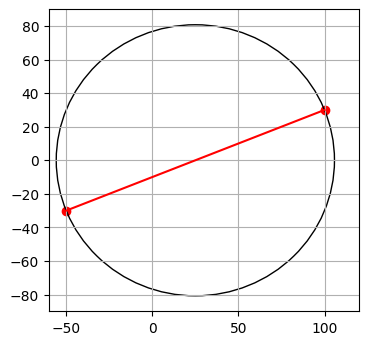

(105.77747210701756, -55.77747210701756, 80.77747210701756)

In [99]:
MohrCircle(100,-50,-30)